<a href="https://colab.research.google.com/github/john-sedrak/ML-CV-Project/blob/main/DS_ML_Project_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<center> ML Apprenticeship Capstone Project: Celebrity Face Recognition


##### <center>Original work: [Sports Celebrity Image Classification — codebasics](https://youtube.com/playlist?list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc)
##### <center> Prepared by: Ahmed Mokhtar

---


In the previous notebook, we collected our image dataset. We acquired a good number of images for each of our celebrities. However by now, you should all be familiar with the phrase "garbage in, garbage out". Training a model with our current data would not be fruitful. As a result, we will spend the entirety of this notebook on data cleaning.

Before we continue with our project, make sure that your dataset is loaded and ready in your working directory. If you do not see it there, you have to do one of two things:

1. Mount your google drive (assuming you uploaded your dataset there)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import the dataset used in the video by running the cell below

In [ ]:
import shutil
from os import path

if path.exists('./dataset'):
    shutil.rmtree('./dataset')

# !git clone https://github.com/IEEE-GUC-DS/dataset.git

<font color="orange">N.B. You will need to click the refresh button to see any changes in your directory.</font><br>
<center><img src="https://i.imgur.com/2VxcX9E.png" alt="refresh">


## Part III: Data Cleaning

Follow along with this video as you solve the notebook: [Data Science & Machine Learning Project - Part 3 Data Cleaning | Image Classification](https://www.youtube.com/watch?v=kwKfWBb6frs&list=PLeo1K3hjS3uvaRHZLl-jLovIjBP14QTXc&index=3)<br><br>

Now that we have acquired the raw data, the next step is to clean and process it for our application. We are trying to recognize faces, so naturally, we have to make sure that every image contains a face. The rest of the image is not of use. 

We will mainly be using [OpenCV](https://en.wikipedia.org/wiki/OpenCV), as it contains useful image processing functions and algorithms.

### A. Basic Functions

<mark>Task: Import the libraries you will need in the code cell below, OpenCV among them.

In [ ]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<mark>Task: Read an image from your dataset (as a matrix), and displays its dimensions.

In [ ]:
# don't forget to put it in a variable
img = cv2.imread('/content/drive/MyDrive/datasets/lionel_messi/0451b03a83.jpg')
img.shape

(464, 824, 3)

<mark>Task: Display the image you just loaded.

<font color="orange">N.B. If the face or (both) eyes are not visible, go back to the previous step and load another image.</font><br>

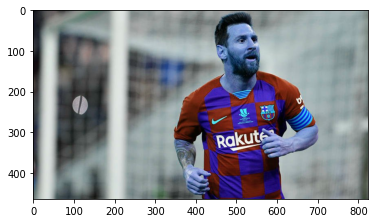

In [ ]:
plt.imshow(img)

<mark>Task: Use OpenCV to convert the image to grayscale, then examine its shape again.

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(464, 824)

<mark>Question: Why did the shape change?

Answer: Grayscale doesn't need an RGB dimension

<mark>Task: Display the grayscale image.

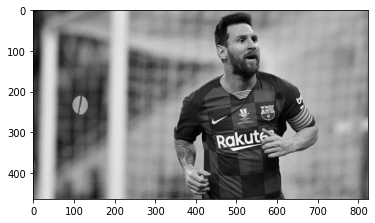

In [ ]:
# if your image looks green and yellow, you probably forgot a parameter ;)
plt.imshow(gray, cmap="gray")

We have learned how to load and display images. Now however, as part of our data cleaning, we need to detect the faces present in the images. This is not an easy task to do manually. Fortunately, OpenCV has an implementation of haar cascade classifiers ready.

Read this article for an en excellent explanation: [Haar Cascades Explained](https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d).

<mark>Task: Initialize 2 haar classifiers. One for frontal faces, and the other for eyes.

Paths:


*   Face: `cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') `
*   Eyes: `cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml')`



In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))

<mark>Task: Detect the faces in your grayscale image using the face detector.

Use a `scaleFactor` (2nd parameter) of **1.3** and a `minNeighbors` (3rd parameter) of **5**.

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[476,  27, 114, 114]], dtype=int32)

To draw a rectangle around the face, we need the coordinates of the face's upper left corner, width, and height of the face. The classifier returns an array containing 4 values for each face. These values are x, y, width, and height.

<mark>Task: Draw a rectangle around the first face present in the image, then display it.

Tip: You can give the function `np.copy(img)` instead of `img` to avoid altering the original image.



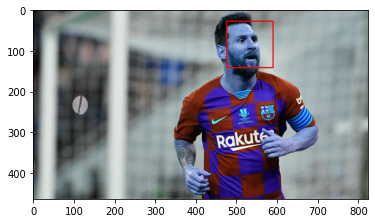

In [ ]:
face_img = cv2.rectangle(np.copy(img), (faces[0][0],faces[0][1]), (faces[0][2]+faces[0][0], faces[0][3]+faces[0][1]),(255,0,0),2)
plt.imshow(face_img)

<mark>Task: Draw a rectangle around all the faces in the image, and their eyes (use the eye detector). After drawing the rectangles, display the image again.

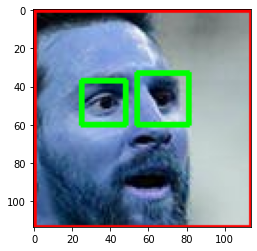

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(np.copy(img), (x,y),(x+w, y+h), (255,0,0),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = face_img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(roi_color, cmap = "gray")
plt.show()

### B. Extracting faces

Now that you are familiar with the functions you will be using to clean your data, we will start the data cleaning process.

<mark>Task: Implement a function that takes an image path, and returns the first face present in the image **only if the detected face has 2 eyes**. Make your function ignore images in unsupported file formats (helpful later on). 

In [ ]:
def get_cropped_face(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(img, 1.3, 5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return img[y:y+h, x:x+w]




<mark>Task: Test your function on an image from your dataset.

<font color="orange">N.B. There are times where haar cascade does not work well. It might not detect the face, or even detect non-face objects as faces. Try different images. </font><br>



Your image does not contain any faces


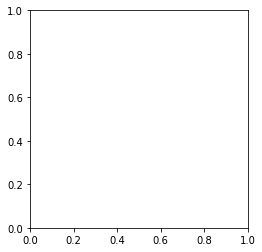

In [ ]:
cropped_image = get_cropped_face('/content/drive/MyDrive/datasets/lionel_messi/02f169fe68.jpg')

try:
  plt.imshow(cropped_image)
except:
  print("Your image does not contain any faces")

We are now sure that our cropping function works, we now need to use it to crop the whole dataset and save it back in another directory.

<mark>Task: Create a new directory called "cropped" inside your dataset folder.



In [ ]:
import os
os.makedirs('/content/drive/MyDrive/datasets/cropped', exist_ok=True)


<mark>Task: The whole notebook has been leading up to this task. Inside the 'cropped' folder, create a directory for each of the celebrities and save their cropped photos there.

<font color="orange">N.B. If your dataset is on google drive, any changes you make will be directly reflected in your drive. No need to upload anything.  </font><br>

In [ ]:
for dir in os.listdir('/content/drive/MyDrive/datasets/'):
  if dir != '.ipynb_checkpoints' and dir != 'cropped':
    or_path = '/content/drive/MyDrive/datasets/'+dir
    cr_path = '/content/drive/MyDrive/datasets/cropped/'+dir
    os.makedirs(cr_path, exist_ok=True)
    for f in os.listdir(or_path):
       img = get_cropped_face(os.path.join(or_path, f))
       if img is not None:
          cv2.imwrite(os.path.join(cr_path,f), img)


You are almost there! The difficult part of the notebook is over. Now the boring (but short) part begins.

Whenever you process data automatically, you have to manually do a sanity check on your data. More often than not, you will find errors made by the algorithm. This will be the final task of this notebook.

<mark>Task: Skim through the cropped data and delete any imperfections in the data (ex. wrong person's face, not a face, blurry face, or a duplicate image).

Our dataset is finally clean and ready for our model. However, we can process our data further to engineer features that are meaningful for our model. Thus, improving its performance. Accordingly, our next notbeook is going to be about feature engineering. But for now, go take a well deserved break!

Keep up the good work! 🎉

<center><img src="https://i.imgur.com/nl8ckKs.gif" width="40%">

